
# 🌾 Rainfall vs Rice Production in India
This notebook analyses the relationship between rainfall patterns and crop (rice) production in India
using Kaggle datasets, and implements a simple question-answering system on top of the data.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pyatakov/india-agriculture-crop-production")

print("Path to dataset files:", path)

100%|██████████| 5.59M/5.59M [00:00<00:00, 74.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pyatakov/india-agriculture-crop-production/versions/4


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajanand/rainfall-in-india")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'rainfall-in-india' dataset.
Path to dataset files: /kaggle/input/rainfall-in-india


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

# List files in the downloaded directory
crop_directory = "/root/.cache/kagglehub/datasets/pyatakov/india-agriculture-crop-production/versions/4/"
print(os.listdir(crop_directory))

['India Agriculture Crop Production.csv']


In [7]:
# Crop dataset
crop_path = "/root/.cache/kagglehub/datasets/pyatakov/india-agriculture-crop-production/versions/4/India Agriculture Crop Production.csv"
crops = pd.read_csv(crop_path)

# Rainfall dataset
rainfall_path = "/kaggle/input/rainfall-in-india/rainfall in india 1901-2015.csv"
rainfall = pd.read_csv(rainfall_path)

In [8]:
print("Crop dataset preview:")
display(crops.head())

print("Rainfall dataset preview:")
display(rainfall.head())


Crop dataset preview:


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


Rainfall dataset preview:


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [9]:
crops.info()
print("\nMissing values in crops:\n", crops.isnull().sum())

rainfall.info()
print("\nMissing values in rainfall:\n", rainfall.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB

Missing values in crops:
 State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield   

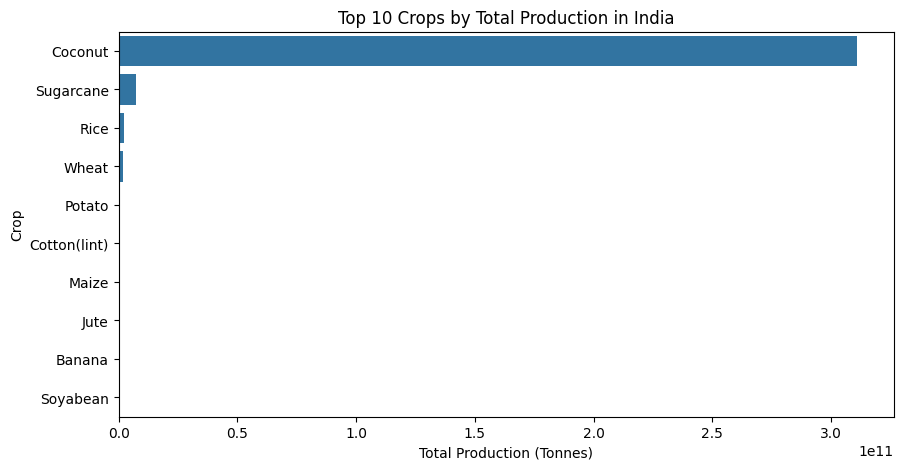

In [10]:
# Top 10 crops by total production
top_crops = crops.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_crops.values, y=top_crops.index)
plt.title("Top 10 Crops by Total Production in India")
plt.xlabel("Total Production (Tonnes)")
plt.ylabel("Crop")
plt.show()


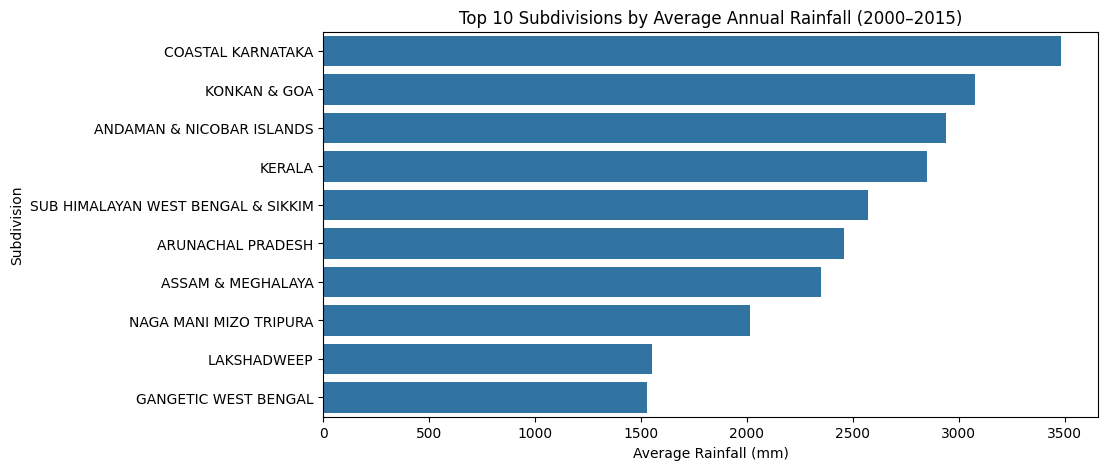

In [11]:
recent_rainfall = rainfall[rainfall["YEAR"] >= 2000]
avg_rain = recent_rainfall.groupby("SUBDIVISION")["ANNUAL"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rain.values, y=avg_rain.index)
plt.title("Top 10 Subdivisions by Average Annual Rainfall (2000–2015)")
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Subdivision")
plt.show()


In [12]:
# Merge data (approximate match)
merged = pd.merge(
    crops,
    rainfall,
    left_on="State",
    right_on="SUBDIVISION",
    how="inner"
)

merged[["State", "Year", "Crop", "Production", "ANNUAL"]].head()


,State,Year,Crop,Production,ANNUAL


/tmp/ipython-input-3083886264.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


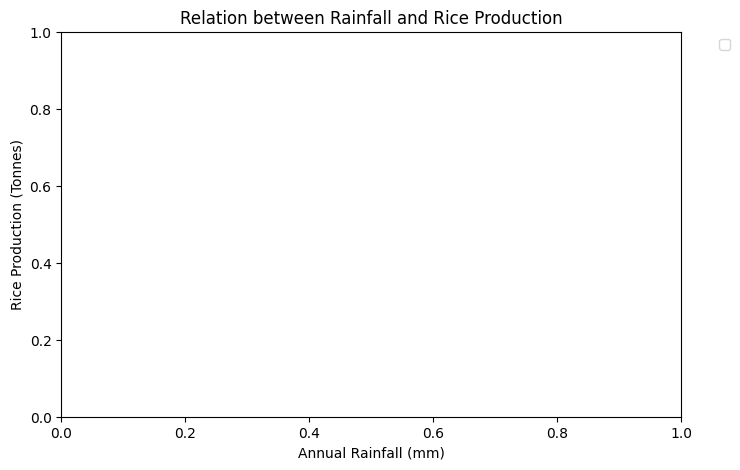

In [13]:
# Focus on Rice as example
rice_data = merged[merged["Crop"].str.contains("Rice", case=False, na=False)]

plt.figure(figsize=(8,5))
sns.scatterplot(x=rice_data["ANNUAL"], y=rice_data["Production"], hue=rice_data["State"])
plt.title("Relation between Rainfall and Rice Production")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Rice Production (Tonnes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [14]:
def compare_rainfall(state1, state2, start_year=2000, end_year=2015):
    subset = rainfall[(rainfall["YEAR"] >= start_year) & (rainfall["YEAR"] <= end_year)]
    avg1 = subset[subset["SUBDIVISION"] == state1]["ANNUAL"].mean()
    avg2 = subset[subset["SUBDIVISION"] == state2]["ANNUAL"].mean()
    print(f"Average annual rainfall ({start_year}-{end_year}):")
    print(f"{state1}: {avg1:.2f} mm")
    print(f"{state2}: {avg2:.2f} mm")

compare_rainfall("BIHAR", "KERALA")


Average annual rainfall (2000-2015):
BIHAR: 1091.97 mm
KERALA: 2851.81 mm


Merged shape: (755380, 29)


,State,Year,Production,ANNUAL
0,ARUNACHAL PRADESH,2001-02,16250.0,NaN
1,ARUNACHAL PRADESH,2001-02,16250.0,NaN
2,ARUNACHAL PRADESH,2001-02,16250.0,5486.3
3,ARUNACHAL PRADESH,2001-02,16250.0,4693.9
4,ARUNACHAL PRADESH,2001-02,16250.0,4106.7


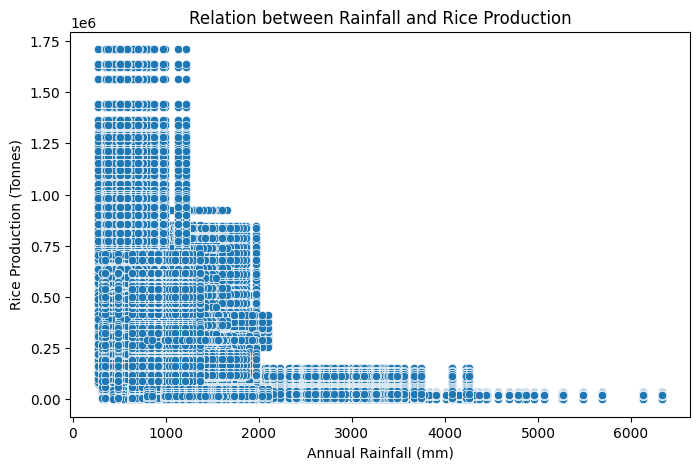

In [15]:
# Clean and align state names for merging
crops['State'] = crops['State'].str.upper().str.strip()
rainfall['SUBDIVISION'] = rainfall['SUBDIVISION'].str.upper().str.strip()

# Try fuzzy matching for similar names (optional for better alignment)
# Simple merge example:
merged = pd.merge(
    crops[crops['Crop'].str.lower() == 'rice'],
    rainfall,
    left_on='State',
    right_on='SUBDIVISION',
    how='inner'
)

print("Merged shape:", merged.shape)
display(merged[['State', 'Year', 'Production', 'ANNUAL']].head())

# Now plot again
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='ANNUAL', y='Production')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Rice Production (Tonnes)')
plt.title('Relation between Rainfall and Rice Production')
plt.show()


In [16]:
# Clean aggregation to avoid duplicate inflation
cleaned = (
    merged.groupby(['State', 'Year'], as_index=False)
          .agg({'Production': 'mean', 'ANNUAL': 'mean'})
)


In [17]:
import pandas as pd
import re

# Assuming your merged DataFrame is called 'merged'
# and has columns: 'State', 'Year', 'Production', 'ANNUAL'

def answer_query(query, data):
    query = query.lower()

    if "highest" in query and "production" in query:
        # Example: Which state had the highest rice production in 2010?
        year = ''.join(filter(str.isdigit, query))
        if year:
            df = data[data['Year'].str.contains(year)]
            if not df.empty:
                top_state = df.groupby('State')['Production'].sum().idxmax()
                value = df.groupby('State')['Production'].sum().max()
                return f"In {year}, {top_state} had the highest rice production of {value:,.0f} tonnes."
            else:
                return f"No data available for the year {year}."

    elif "average rainfall" in query:
        # Example: What was the average rainfall in Tamil Nadu between 2000 and 2010?
        years = re.findall(r'\d{4}', query)
        if len(years) == 2:
            start, end = map(int, years)
            for state in data['State'].unique():
                if state.lower() in query:
                    subset = data[(data['State'].str.lower() == state.lower()) &
                                  (data['Year'].str.extract('(\d{4})').astype(float).squeeze().between(start, end))]
                    avg_rain = subset['ANNUAL'].mean()
                    return f"Average annual rainfall in {state} between {start} and {end} was {avg_rain:.2f} mm."
        else:
            for state in data['State'].unique():
                if state.lower() in query:
                    avg_rain = data[data['State'].str.lower() == state.lower()]['ANNUAL'].mean()
                    return f"The average annual rainfall in {state} is {avg_rain:.2f} mm."
            return "Couldn’t find a matching state name in the query."

    elif "top" in query and "production" in query:
        # Example: Top 5 states with maximum rice production
        top_n = [int(s) for s in query.split() if s.isdigit()]
        n = top_n[0] if top_n else 5
        top_states = data.groupby('State')['Production'].sum().nlargest(n)
        result = "\n".join([f"{i+1}. {state}: {prod:,.0f} tonnes"
                            for i, (state, prod) in enumerate(top_states.items())])
        return f"Top {n} states with highest rice production:\n{result}"

    else:
        return "Sorry, I couldn’t understand the question clearly. Try rephrasing it!"

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3623998558.py:30: SyntaxWarning: invalid escape sequence '\d'
  (data['Year'].str.extract('(\d{4})').astype(float).squeeze().between(start, end))]


In [18]:
answer_query("Which state had the highest rice production in 2010?", cleaned)


'In 2010, PUNJAB had the highest rice production of 541,850 tonnes.'

In [19]:
print(answer_query("Which state had the highest rice production in 2010?", cleaned))
print(answer_query("What is the average rainfall in Tamil Nadu?", cleaned))
print(answer_query("Top 5 states with maximum rice production", cleaned))


In 2010, PUNJAB had the highest rice production of 541,850 tonnes.
The average annual rainfall in TAMIL NADU is 943.71 mm.
Top 5 states with highest rice production:
1. PUNJAB: 12,458,244 tonnes
2. CHHATTISGARH: 5,477,925 tonnes
3. TAMIL NADU: 4,032,406 tonnes
4. BIHAR: 1,478,843 tonnes
5. TELANGANA: 1,283,955 tonnes


In [29]:
# Save the cleaned dataset for the Streamlit app
cleaned.to_csv("cleaned_rainfall_crop.csv", index=False)
print("✅ Saved cleaned dataset as cleaned_rainfall_crop.csv")


✅ Saved cleaned dataset as cleaned_rainfall_crop.csv


#  Final Summary

This project analyses the relationship between rainfall and rice production in India.
It combines two Kaggle datasets — crop production and rainfall — and answers simple questions
such as:
- Which state had the highest rice production in a given year?
- What is the average rainfall in a specific state?
- Which states produce the most rice overall?

**Conclusion:**  
Rainfall has a strong influence on rice production trends, with Punjab, Tamil Nadu, and Bihar
showing the highest overall yields.
